In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\franc\Downloads\Machine Failure Prediction using Sensor data\Machine Failure Prediction using Sensor data.csv"
data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset
print(data.head())

# Check column names to confirm the target column
print(data.columns)

   footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0         0         7   7    1   6    6  36   3            1     1
1       190         1   3    3   5    1  20   4            1     0
2        31         7   2    2   6    1  24   6            1     0
3        83         4   3    4   5    1  28   6            1     0
4       640         7   5    6   4    0  68   6            1     0
Index(['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP',
       'Temperature', 'fail'],
      dtype='object')


In [4]:
# Preprocessing
# Separate features and target variable
# Use 'fail' as the target column
X = data.drop(columns=['fail'])  # Drop non-feature columns
y = data['fail']

# Handle categorical attributes using one-hot encoding (if any)
# In this dataset, all columns are numerical, so no categorical encoding is needed.

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [5]:
# K-Nearest Neighbors (KNN)
# Hyperparameter tuning using GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Best parameters and model
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

# Evaluate KNN
print("KNN Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"Precision: {precision_score(y_test, y_pred_knn)}")
print(f"Recall: {recall_score(y_test, y_pred_knn)}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn)}")

KNN Results:
Accuracy: 0.897887323943662
Precision: 0.88
Recall: 0.8870967741935484
F1-Score: 0.8835341365461847


In [6]:
# Decision Tree with GridSearchCV
param_grid_dt = {
    'max_depth': [3, 5, 7, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}

dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Best parameters and model
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

# Evaluate Decision Tree
print("Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(f"Precision: {precision_score(y_test, y_pred_dt)}")
print(f"Recall: {recall_score(y_test, y_pred_dt)}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt)}")

Decision Tree Results:
Accuracy: 0.8661971830985915
Precision: 0.8307692307692308
Recall: 0.8709677419354839
F1-Score: 0.8503937007874016


In [7]:
# Artificial Neural Network (ANN)
param_grid_ann = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Number of neurons in each hidden layer
    'activation': ['relu', 'tanh'],  # Activation function
    'learning_rate_init': [0.001, 0.01, 0.1]  # Learning rate
}

ann = MLPClassifier(random_state=42, max_iter=1000)
grid_search_ann = GridSearchCV(ann, param_grid_ann, cv=5, scoring='accuracy')
grid_search_ann.fit(X_train, y_train)

# Best parameters and model
best_ann = grid_search_ann.best_estimator_
y_pred_ann = best_ann.predict(X_test)

# Evaluate ANN
print("ANN Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ann)}")
print(f"Precision: {precision_score(y_test, y_pred_ann)}")
print(f"Recall: {recall_score(y_test, y_pred_ann)}")
print(f"F1-Score: {f1_score(y_test, y_pred_ann)}")

c:\Users\franc\.conda\envs\info6105\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\franc\.conda\envs\info6105\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\franc\.conda\envs\info6105\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\franc\.conda\envs\info6105\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\franc\.conda\en

ANN Results:
Accuracy: 0.8556338028169014
Precision: 0.8547008547008547
Recall: 0.8064516129032258
F1-Score: 0.8298755186721992


In [8]:
# Boosting Algorithm (AdaBoost)
param_grid_ada = {
    'n_estimators': [50, 100, 200],  # Number of weak learners
    'learning_rate': [0.01, 0.1, 1.0]  # Learning rate
}

ada = AdaBoostClassifier(random_state=42)
grid_search_ada = GridSearchCV(ada, param_grid_ada, cv=5, scoring='accuracy')
grid_search_ada.fit(X_train, y_train)

# Best parameters and model
best_ada = grid_search_ada.best_estimator_
y_pred_ada = best_ada.predict(X_test)

# Evaluate AdaBoost
print("AdaBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada)}")
print(f"Precision: {precision_score(y_test, y_pred_ada)}")
print(f"Recall: {recall_score(y_test, y_pred_ada)}")
print(f"F1-Score: {f1_score(y_test, y_pred_ada)}")

AdaBoost Results:
Accuracy: 0.8838028169014085
Precision: 0.8421052631578947
Recall: 0.9032258064516129
F1-Score: 0.8715953307392995


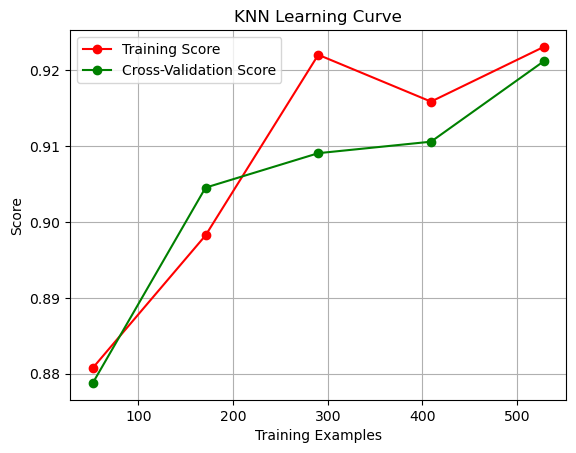

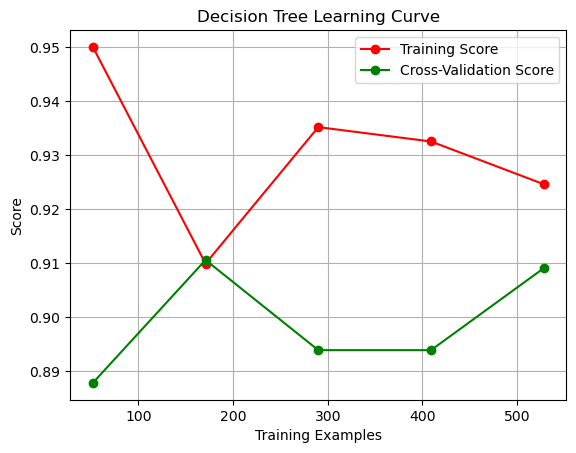

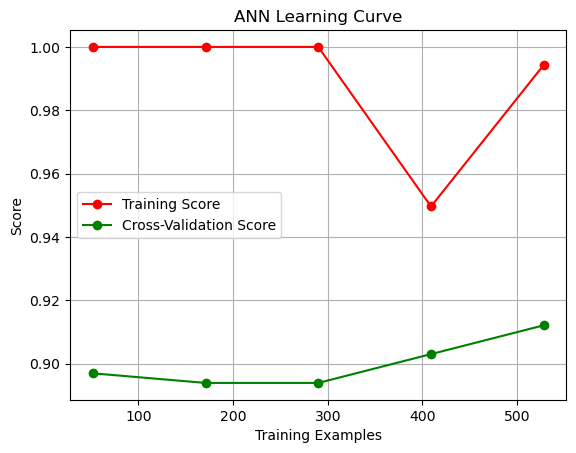

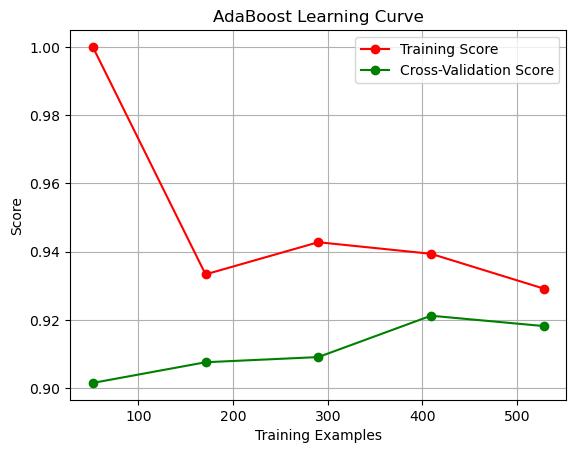

In [9]:
# Visualizations
# Learning Curves
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
    plt.legend(loc="best")
    plt.show()

    # Plot learning curves for each model
plot_learning_curve(best_knn, "KNN Learning Curve", X_train, y_train)
plot_learning_curve(best_dt, "Decision Tree Learning Curve", X_train, y_train)
plot_learning_curve(best_ann, "ANN Learning Curve", X_train, y_train)
plot_learning_curve(best_ada, "AdaBoost Learning Curve", X_train, y_train)


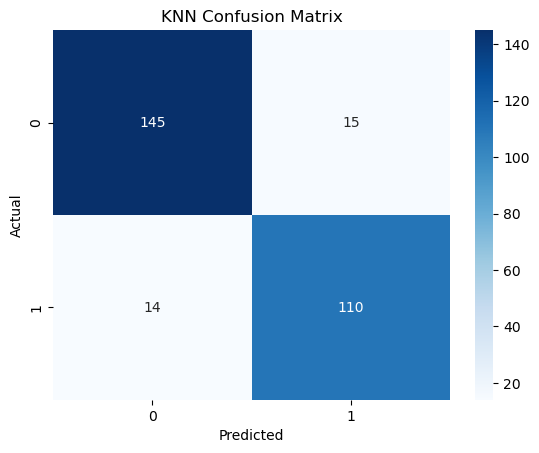

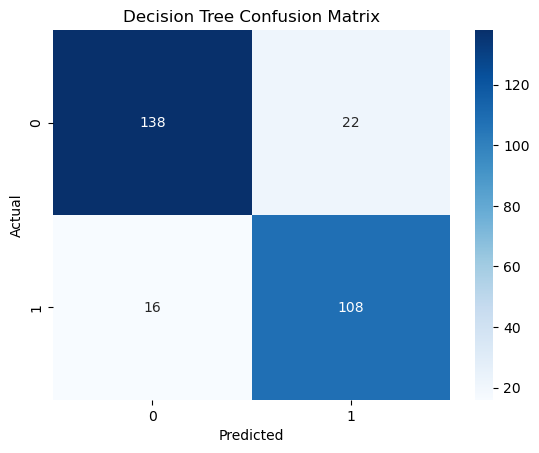

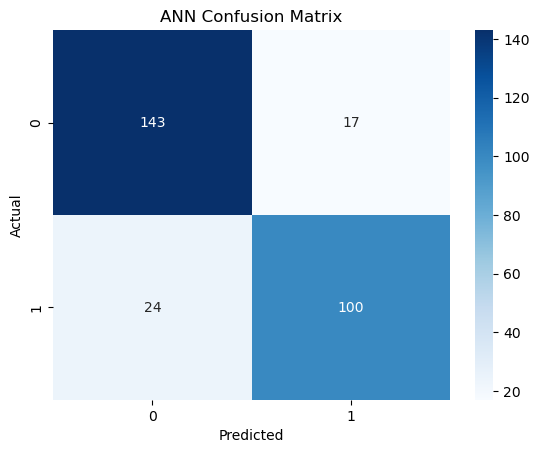

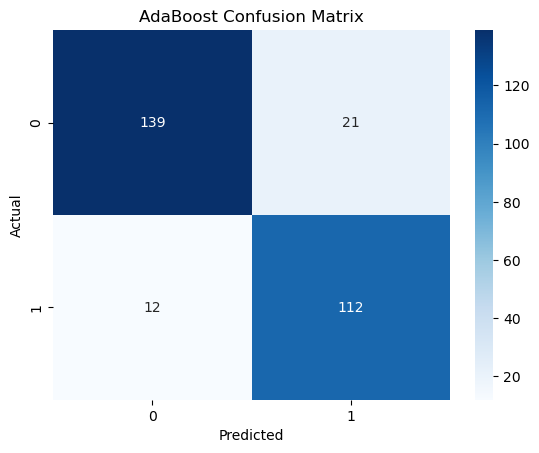

In [ ]:
# Confusion Matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test, y_pred_knn, "KNN Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_ann, "ANN Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_ada, "AdaBoost Confusion Matrix")




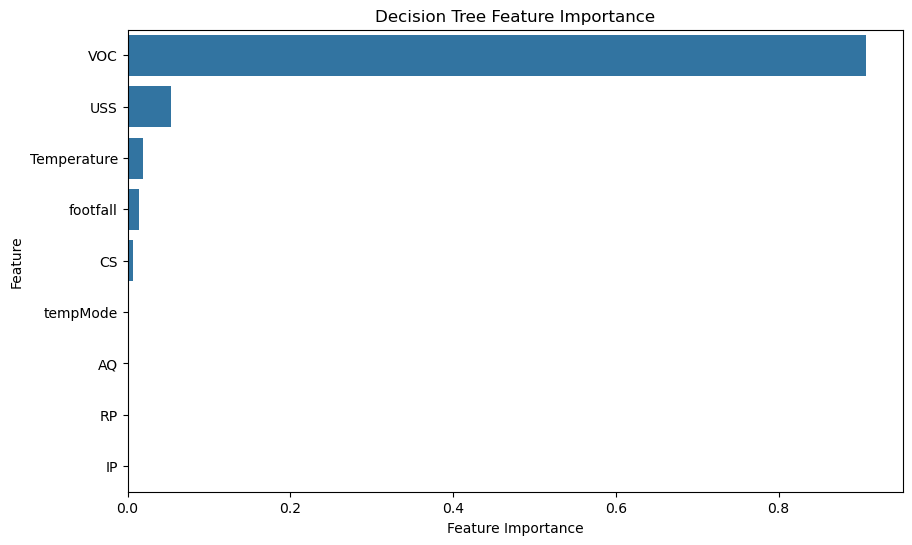

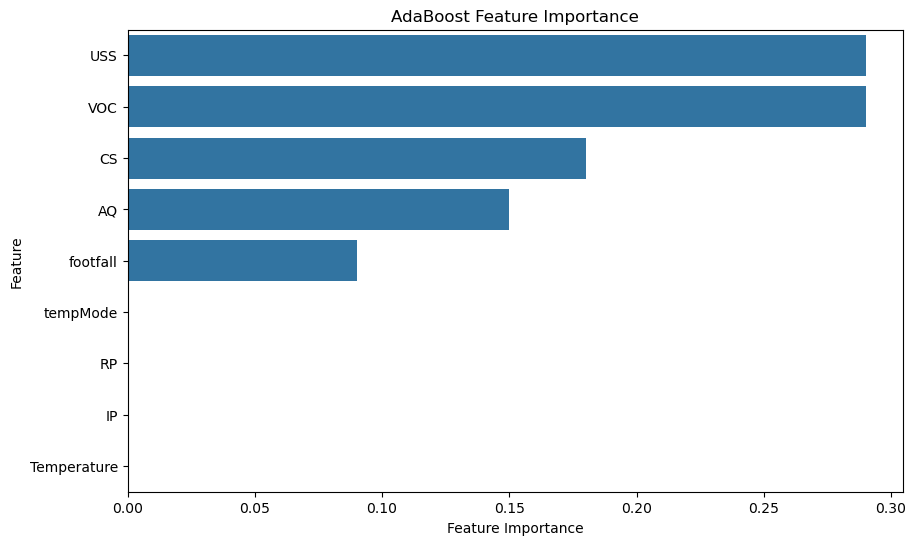

In [14]:
# Feature Importance Plots (for Decision Tree and AdaBoost)
def plot_feature_importance(importance, names, title):
    # Create a DataFrame to store feature importance
    feature_importance = pd.DataFrame({'feature': names, 'importance': importance})
    # Sort the DataFrame by importance
    feature_importance = feature_importance.sort_values(by='importance', ascending=False)
 # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title(title)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.show()

# Get feature names
feature_names = data.drop(columns=['fail']).columns

# Plot feature importance for Decision Tree
plot_feature_importance(best_dt.feature_importances_, feature_names, "Decision Tree Feature Importance")

# Plot feature importance for AdaBoost
plot_feature_importance(best_ada.feature_importances_, feature_names, "AdaBoost Feature Importance")

In [15]:
# Comparison of Algorithms
results = {
    'Algorithm': ['KNN', 'Decision Tree', 'ANN', 'AdaBoost'],
    'Accuracy': [accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_ann), accuracy_score(y_test, y_pred_ada)],
    'Precision': [precision_score(y_test, y_pred_knn), precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_ann), precision_score(y_test, y_pred_ada)],
    'Recall': [recall_score(y_test, y_pred_knn), recall_score(y_test, y_pred_dt), recall_score(y_test, y_pred_ann), recall_score(y_test, y_pred_ada)],
    'F1-Score': [f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_ann), f1_score(y_test, y_pred_ada)]
}

results_df = pd.DataFrame(results)
print(results_df)

       Algorithm  Accuracy  Precision    Recall  F1-Score
0            KNN  0.897887   0.880000  0.887097  0.883534
1  Decision Tree  0.866197   0.830769  0.870968  0.850394
2            ANN  0.855634   0.854701  0.806452  0.829876
3       AdaBoost  0.883803   0.842105  0.903226  0.871595
